# View Radial Distribution Functions

Start by importing some modules and data and defining some helper functions:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
%matplotlib inline

df = pd.read_csv('../data/adaptive_learn_results.csv')
rdf_df = pd.read_hdf('../data/radial_distribution_functions.h5')

def draw(smiles):
    Draw.MolToMPL(Chem.MolFromSmiles(smiles))

## Systems with Unique RDF Behavior

this methanesulfate system has a very small cation with seven heavy atoms. This may explain its strange cation-cation and cation-anion RDFs but they still deviate far from similar heavy atom systems look like.
`CSC(N)[NH+](Cl)Cl.CS(=O)(=O)[O-]`


The coiling of the long 11 carbon alkyl tail in this Imidazolium causes the cation-cation RDF to peak at short distances.
`Cc1ccc[n+](CCCCCCCCCCCP)c1.NCCS(=O)(=O)[O-]`

The cyclopropane functional group may be causing the sharp spikes early on in the cation-anion RDF. Another distinguishing characteristic is the nearly equal cation-anion and anion-anion peak intensities.
`CCNC(=O)[SH]([NH3+])PCC(C)C1CC1.NCCCC[C@H](N)C(=O)[O-]`

,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,predicted cpt,predicted density,calculated cpt,calculated density,"% error, cpt","% error, density",Round,Series,Category,"kde, density","kde, cpt","kde, multivariate"
109,CCNC(=O)[SH]([NH3+])PCC(C)C1CC1.NCCCC[C@H](N)C...,14,0.504065,triethyloctylammonium,L-lysinate,660.90,880.30,748.60,1073.06,11.72,17.96,1,2,Ammonium,0.444094,0.475583,1.364041
255,CSC(N)[NH+](Cl)Cl.CS(=O)(=O)[O-],7,0.516129,1-methyl-3-octyl-1H-imidazol-3-ium,methanesulfonate,687.62,1546.57,308.84,1389.48,122.65,11.31,1,2,Imidazolium,0.298415,0.196333,1.585561
321,Cc1ccc[n+](CCCCCCCCCCCP)c1.NCCS(=O)(=O)[O-],19,0.956044,N-octyl-3-methylpyridinium,2-aminoethanesulfonate,986.73,1068.57,836.29,1076.03,17.99,0.69,2,1,Pyridinium,2.937685,0.221304,1.152446


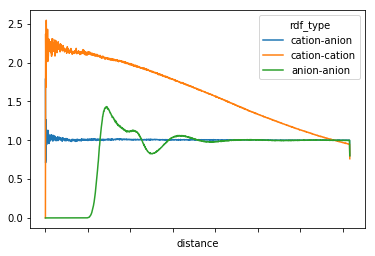

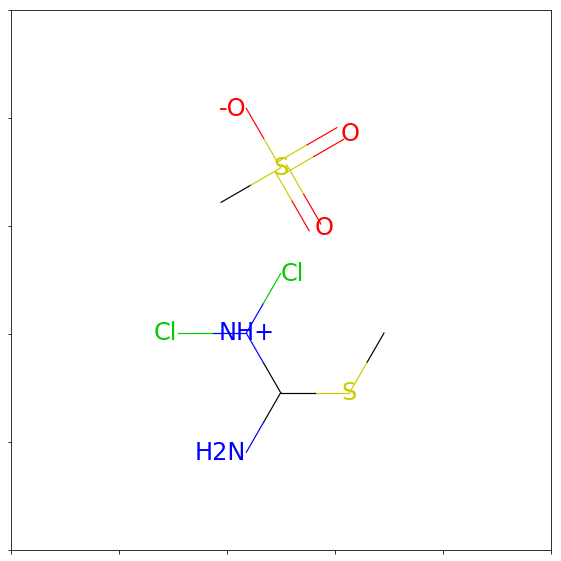

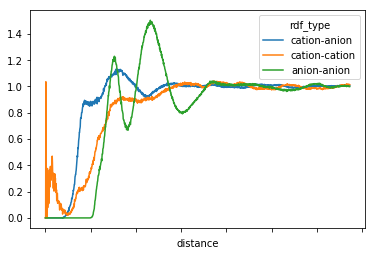

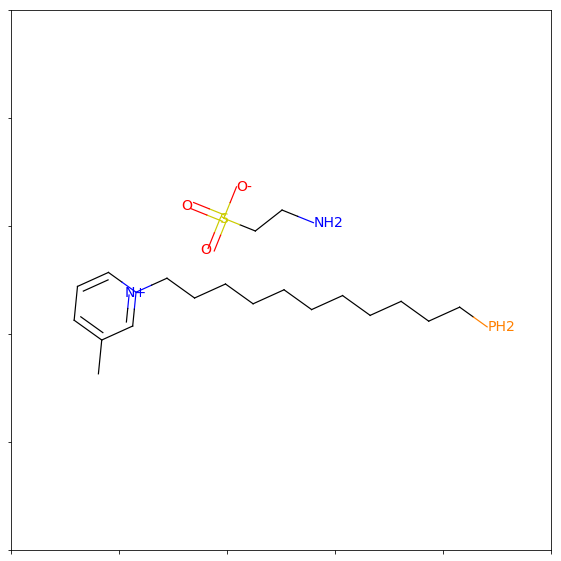

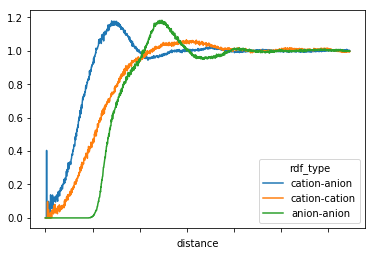

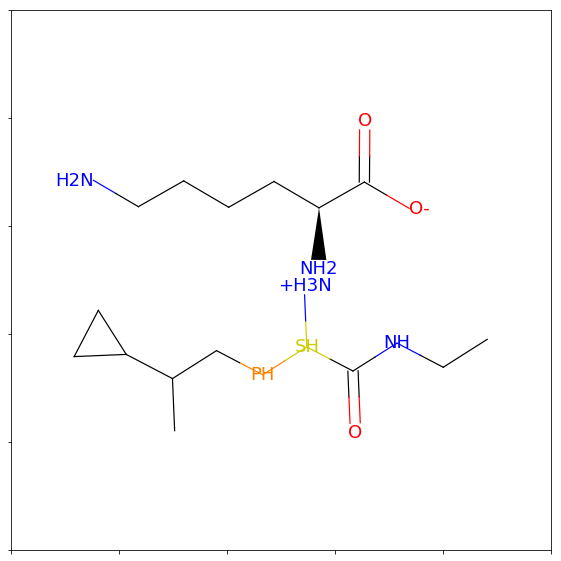

In [47]:
curious = ['CSC(N)[NH+](Cl)Cl.CS(=O)(=O)[O-]', 'Cc1ccc[n+](CCCCCCCCCCCP)c1.NCCS(=O)(=O)[O-]',
           'CCNC(=O)[SH]([NH3+])PCC(C)C1CC1.NCCCC[C@H](N)C(=O)[O-]']
display(df.loc[df['Salt Smiles'].isin(curious)])
for i in curious:
    rdf_df[i].plot()
    draw(i)

## Systems with Strong Anion-Anion peaks

This thiocyanate system has a very strong anion-anion peak. The RDF deviates quite a bit from other RDFs of systems with the same anion.
`CCCCC(C[N+](C)(C)CC)OC(C)=O.N#C[S-]`

Otherwise, strong anion-anion peaks usually occur when the cation contains a long alkyl chain, forcing anion groups to cluster together. `PCCCCCCCCCCC[n+]1ccccc1.C[C@@H](O)[C@H](N)C(=O)[O-]`,
          `Cc1cc[n+](CCCCCCCCCCCP)cc1.NCCS(=O)(=O)[O-]`, `CCCCCCCCCCC[n+]1ccn(CC)c1.O=C([O-])C(F)(F)F`


,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,predicted cpt,predicted density,calculated cpt,calculated density,"% error, cpt","% error, density",Round,Series,Category,"kde, density","kde, cpt","kde, multivariate"
122,CCCCCCCCCCC[n+]1ccn(CC)c1.O=C([O-])C(F)(F)F,18,0.959538,1-methyl-3-octyl-1H-imidazol-3-ium,trifluoroacetate,597.32,1073.02,707.12,1024.04,15.53,4.78,1,2,Imidazolium,1.975200,0.659469,1.796006
292,CCCCC(C[N+](C)(C)CC)OC(C)=O.N#C[S-],15,0.500000,"N,N,N-triethyldodecan-1-aminium",thiocyanate,777.46,1103.91,703.33,974.76,10.54,13.25,1,2,Aminium,2.294899,0.269324,1.365175
320,Cc1cc[n+](CCCCCCCCCCCP)cc1.NCCS(=O)(=O)[O-],19,0.884892,1-butyl-2-methylpyridinium,2-aminoethanesulfonate,971.82,1065.00,739.63,1072.17,31.39,0.67,2,1,Pyridinium,3.276198,0.137879,1.152446
356,PCCCCCCCCCCC[n+]1ccccc1.C[C@@H](O)[C@H](N)C(=O...,18,0.822034,1-butylpyridinium,L-threoninate,998.06,1072.36,831.64,1022.84,20.01,4.84,3,1,Pyridinium,2.204337,0.230972,1.153971


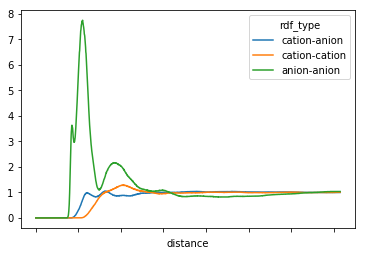

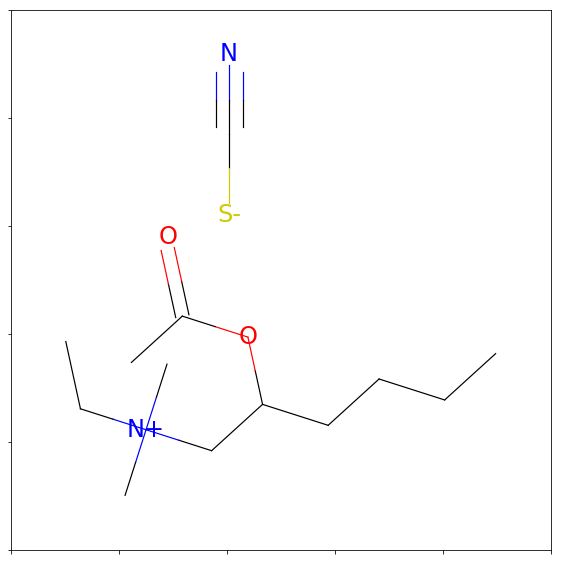

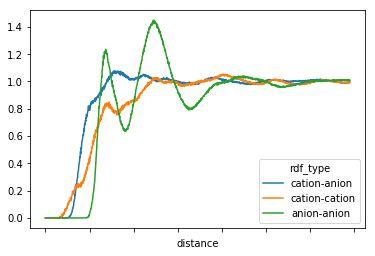

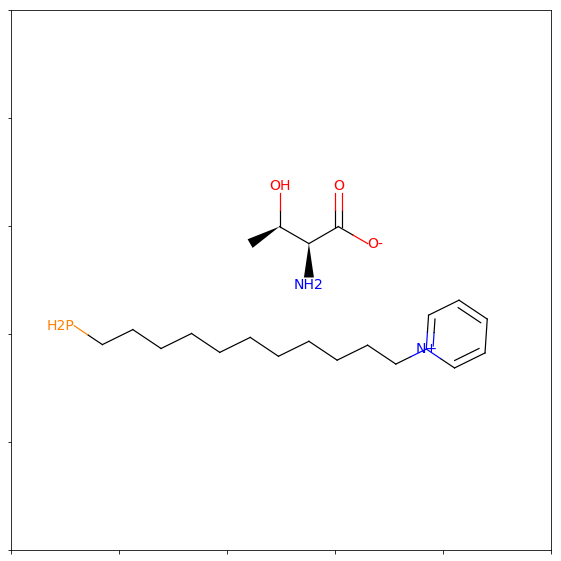

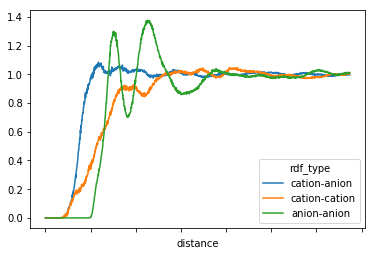

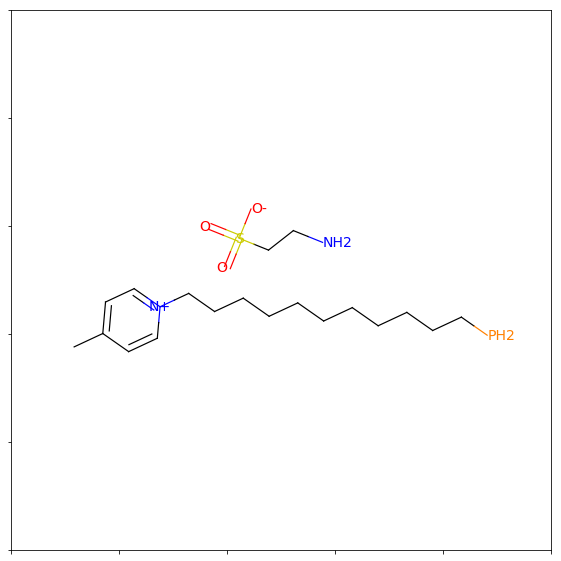

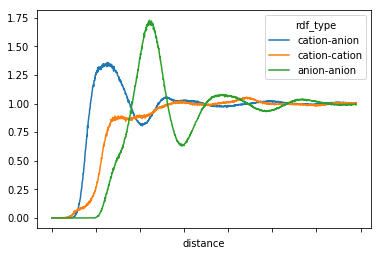

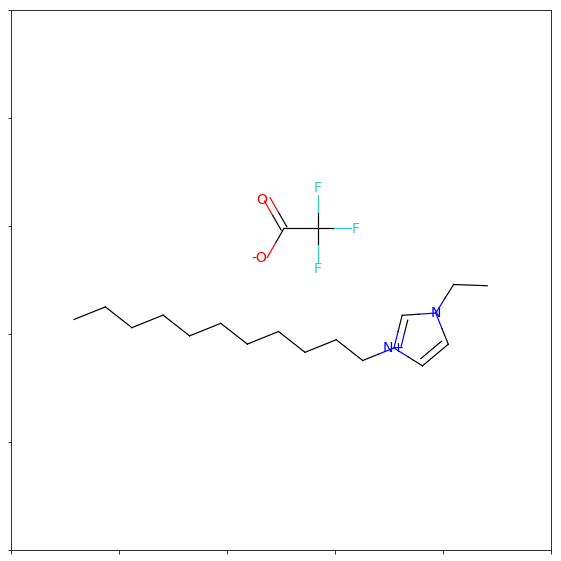

In [45]:
curious = ['CCCCC(C[N+](C)(C)CC)OC(C)=O.N#C[S-]', 'PCCCCCCCCCCC[n+]1ccccc1.C[C@@H](O)[C@H](N)C(=O)[O-]',
          'Cc1cc[n+](CCCCCCCCCCCP)cc1.NCCS(=O)(=O)[O-]', 'CCCCCCCCCCC[n+]1ccn(CC)c1.O=C([O-])C(F)(F)F']
display(df.loc[df['Salt Smiles'].isin(curious)])
for i in curious:
    rdf_df[i].plot()
    draw(i)

## Systems with Strong Cation-Cation peaks

Salts comprised of octyl sulfate as its anion tended to have strong cation-cation peaks due to the long octyl alkane tail. `C[N+](C)(C)C(F)CC(C(N)=O)C(N)=O.CCCCCCCCOS(=O)(=O)[O-]`,
           `CCCC(C)c1cccc[n+]1C(CCP)C(F)(F)F.CCCCCCCCOS(=O)(=O)[O-]`,
          `CCCC(CC)n1cc[n+](C(CC)SN)c1.CCCCCCCCOS(=O)(=O)[O-]`


,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,predicted cpt,predicted density,calculated cpt,calculated density,"% error, cpt","% error, density",Round,Series,Category,"kde, density","kde, cpt","kde, multivariate"
20,CCCC(C)c1cccc[n+]1C(CCP)C(F)(F)F.CCCCCCCCOS(=O...,19,0.539419,1-ethyl-2-methylpyridinium,octyl sulfate,1014.48,1007.66,923.17,1105.62,9.89,8.86,1,1,Pyridinium,2.684373,0.113676,1.140787
105,CCCC(CC)n1cc[n+](C(CC)SN)c1.CCCCCCCCOS(=O)(=O)...,16,0.629108,1-butyl-3-methylimidazolium,octyl sulfate,986.58,1075.73,849.95,1047.97,16.08,2.65,1,2,Imidazolium,1.422536,0.227302,1.153971
351,C[N+](C)(C)C(F)CC(C(N)=O)C(N)=O.CCCCCCCCOS(=O)...,14,0.536364,triethyloctylammonium,octyl sulfate,1054.28,1003.09,863.27,1192.80,22.13,15.90,3,1,Ammonium,1.737734,0.126414,1.102001


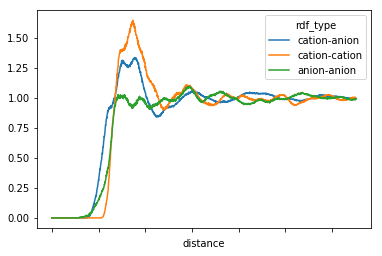

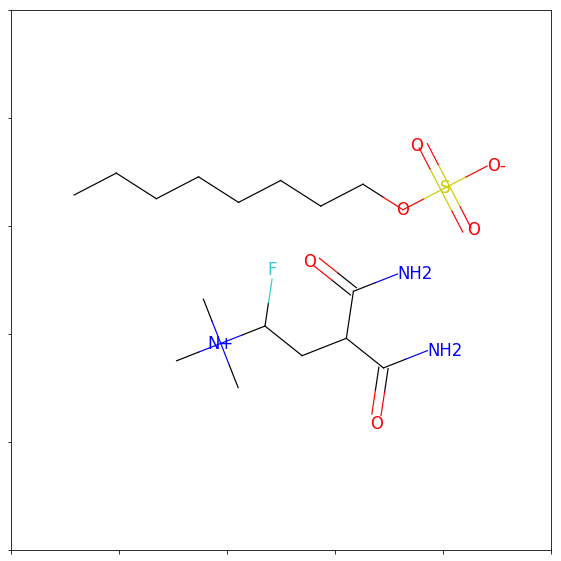

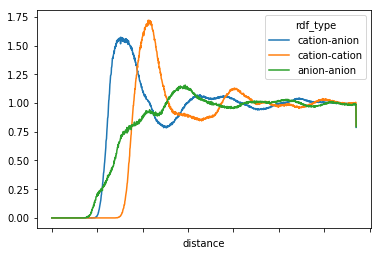

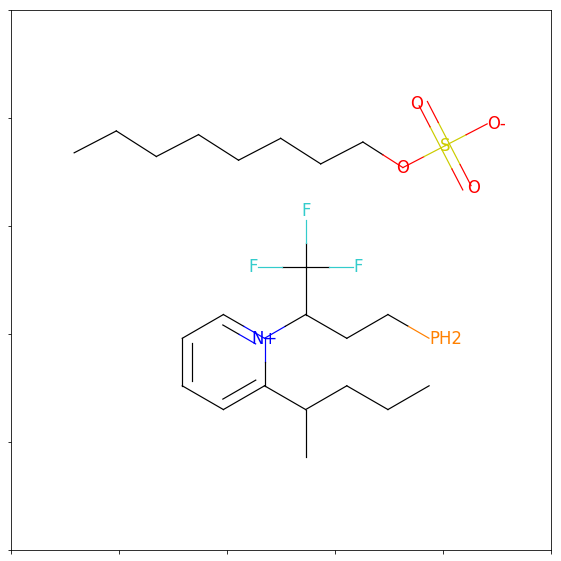

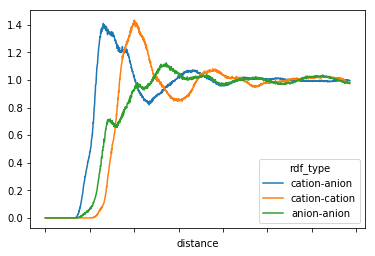

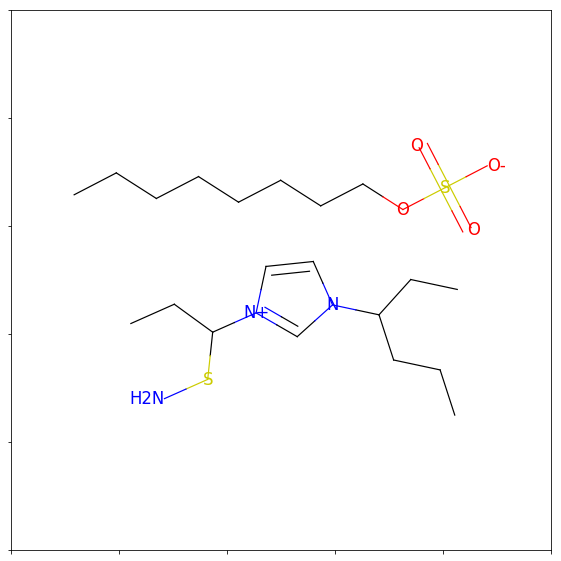

In [52]:
curious = ['C[N+](C)(C)C(F)CC(C(N)=O)C(N)=O.CCCCCCCCOS(=O)(=O)[O-]',
           'CCCC(C)c1cccc[n+]1C(CCP)C(F)(F)F.CCCCCCCCOS(=O)(=O)[O-]',
          'CCCC(CC)n1cc[n+](C(CC)SN)c1.CCCCCCCCOS(=O)(=O)[O-]']
display(df.loc[df['Salt Smiles'].isin(curious)])
for i in curious:
    rdf_df[i].plot()
    draw(i)

## Systems with Strong Cation-Anion peaks

Salts with small and/or elemental anions tended to form strong cation-anion peaks. `CCCC([NH3+])C(C)(CCC)N(N=N)C(C)=O.[Cl-]`, `CCCCC(CCC)C1CCC(N=C=O)(C(C)=O)[NH2+]1.CC(=O)[O-]`


,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,predicted cpt,predicted density,calculated cpt,calculated density,"% error, cpt","% error, density",Round,Series,Category,"kde, density","kde, cpt","kde, multivariate"
300,CCCCC(CCC)C1CCC(N=C=O)(C(C)=O)[NH2+]1.CC(=O)[O-],19,0.512000,1-ethylpyridinium,acetate,896.28,1127.69,663.09,1014.03,35.17,11.21,1,2,Pyridinium,2.002803,0.316099,1.218696
328,CCCC([NH3+])C(C)(CCC)N(N=N)C(C)=O.[Cl-],16,0.507937,1-ethylpyridinium,chloride,1048.13,1046.05,460.58,1018.01,127.57,2.75,2,1,Pyridinium,1.994285,0.099809,1.109199


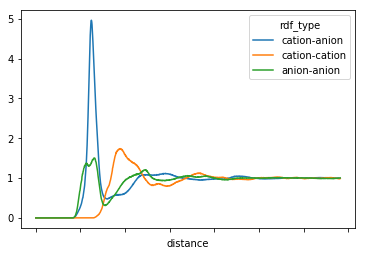

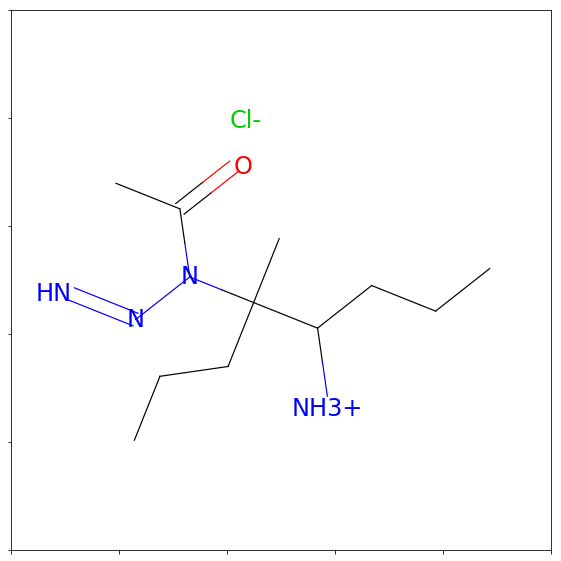

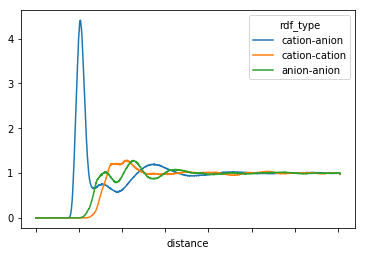

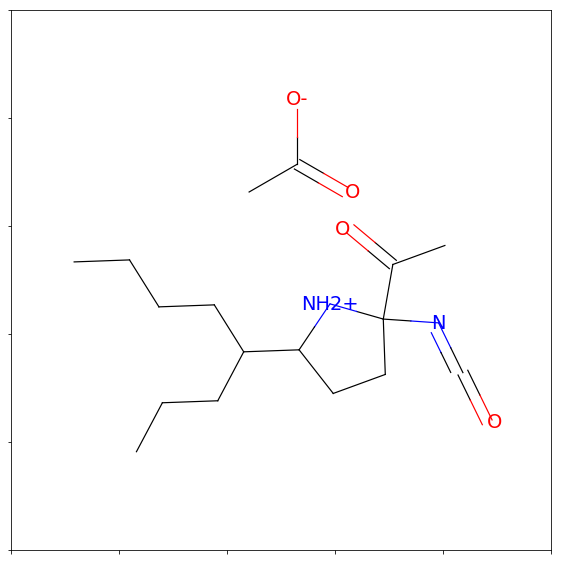

In [54]:
curious = ['CCCC([NH3+])C(C)(CCC)N(N=N)C(C)=O.[Cl-]', 'CCCCC(CCC)C1CCC(N=C=O)(C(C)=O)[NH2+]1.CC(=O)[O-]']
display(df.loc[df['Salt Smiles'].isin(curious)])
for i in curious:
    rdf_df[i].plot()
    draw(i)

## Further Exploration

Use the values in `df` to determine what systems you'd like to view in the `radial_distribution_functions.h5` file using the salt smiles strings as keys.

In [3]:
dff = df#.loc[df['Anion'] == 'octyl sulfate']
dff = dff.sort_values('calculated cpt', ascending=False)
dff.reset_index(inplace=True, drop=True)
smi = []
for i in range(5):
    smi.append(dff['Salt Smiles'][i])
dff.head()

,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,predicted cpt,predicted density,calculated cpt,calculated density,"% error, cpt","% error, density",Round,Series,Category,"kde, density","kde, cpt","kde, multivariate"
0,CCCCC(CC)(CCC)CC[N+]1=C(S)CCC1.C[C@@H](O)[C@H]...,18,0.513274,"N,N,N-triethyldodecan-1-aminium",L-threoninate,985.42,1043.23,1143.26,1005.70,13.81,3.73,1,1,Aminium,2.442994,0.219563,1.147646
1,Cc1ccc[n+](CCCCCCCCCCCP)c1.CCCCCCCCOS(=O)(=O)[O-],19,0.956044,N-octyl-3-methylpyridinium,octyl sulfate,943.63,1019.20,965.93,1001.44,2.31,1.77,3,1,Pyridinium,1.333716,0.093854,1.191181
2,CCCCCCCC[n+]1cccc(CCCC)c1.CCCCCCCCOS(=O)(=O)[O-],18,0.719008,N-octyl-3-methylpyridinium,octyl sulfate,920.58,989.77,962.39,961.31,4.34,2.96,4,1,Pyridinium,0.924665,0.312122,1.181195
3,CCC(CC)CCCCCCCn1cc[n+](S)c1N.CCCCCCCCOS(=O)(=O...,19,0.623762,1-butyl-3-methylimidazolium,octyl sulfate,990.99,997.82,953.28,1030.46,3.96,3.17,2,1,Imidazolium,0.723162,0.242128,1.137191
4,CCCCC(CC)(CCC)CC[N+]1=C(S)CCC1.CCCCCCCCOS(=O)(...,18,0.513274,"N,N,N-triethyldodecan-1-aminium",octyl sulfate,1014.30,989.43,949.06,991.95,6.87,0.25,3,1,Aminium,0.920995,0.115577,1.135357


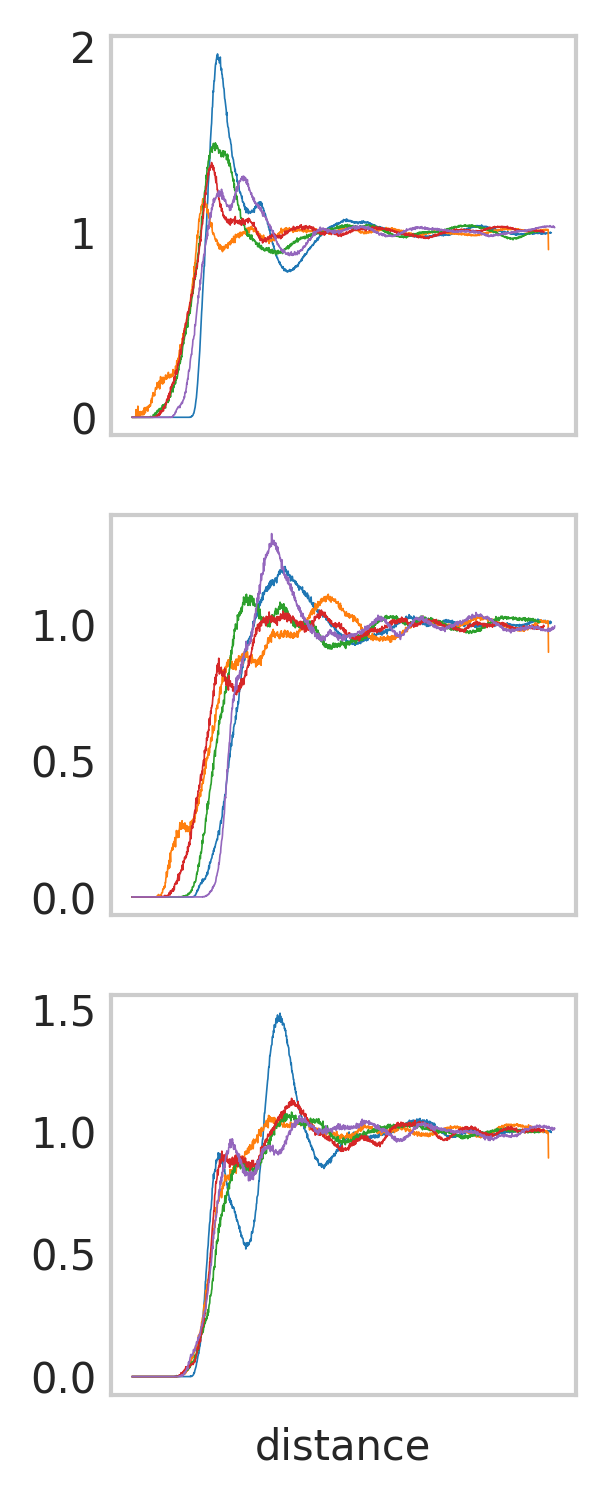

In [4]:
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(2,6), dpi=300)
    ax1=fig.add_subplot(311)
    ax2=fig.add_subplot(312)
    ax3=fig.add_subplot(313)
    for i in smi:
        rdf_df[i]['cation-anion'].plot(ax=ax1, grid=False, sharex=True,
                                       alpha=1, linewidth=0.4)
        rdf_df[i]['cation-cation'].plot(ax=ax2, grid=False, sharex=True,
                                       alpha=1, linewidth=0.4)
        rdf_df[i]['anion-anion'].plot(ax=ax3, grid=False, sharex=True,
                                       alpha=1, linewidth=0.4)

In [5]:
fig.savefig('../../ALD_Manuscript/assets/rdf_high_cpt_all.png', dpi=300, bbox_inches='tight')

# Using Raw RDF Files

If you would like to create the rdf dataframe yourself, you can do so with the following cell after unzipping the rdf files in `data/molecular_dynamics/radial_distribution_function/`

In [746]:
path = '../data/molecular_dynamics/radial_distribution_function/'
for j in range(0,df.shape[0]):
    # select cation
    cat = dff['Salt Smiles'][j].split(".")[0] 
    ani = dff['Salt Smiles'][j].split(".")[1] 

    # calculate indices and set columns
    distances = pd.read_csv("{}RDF_CA_{}_{}.xvg".format(path,cat,ani), header=24, 
                              delimiter="\s+", names=['distance', 'cation-anion'])\
                                ['distance'].values
    ix = distances
    index = pd.MultiIndex.from_arrays([ix], names= ['distance'])
    columns = pd.MultiIndex.from_product([[cat+"."+ani], ['cation-anion', 'cation-cation',
                                                  'anion-anion']],
                                            names= ['smiles', 'rdf_type'])

    # open files
    ca = pd.read_csv("{}RDF_CA_{}_{}.xvg".format(path,cat,ani), header=24, 
                          delimiter="\s+", names=['distance', 'cation-anion'],
                         index_col='distance')
    cc = pd.read_csv("{}RDF_CC_{}_{}.xvg".format(path,cat,ani), header=24, 
                          delimiter="\s+", names=['distance', 'cation-cation'],
                     index_col='distance')
    aa = pd.read_csv("{}RDF_AA_{}_{}.xvg".format(path,cat,ani), header=24, 
                          delimiter="\s+", names=['distance', 'anion-anion'],
                     index_col='distance')
    entry = pd.concat([ca,cc,aa], axis=1, names='rdf_type')
    new_df = pd.DataFrame(data=entry.values, columns=columns, index=index)
    if j == 0:
        rdf_df = new_df
    else: 
        rdf_df = rdf_df.join(new_df)
# rdf_df.to_hdf('../data/radial_distribution_functions.h5', key='smiles')